<a href="https://colab.research.google.com/github/therealfortune/tensorflow-fortune/blob/master/SarcasmDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import json
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
vocab_size = 1000
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"
pad_type = "post"
max_length = 100
training_size = 20000

In [45]:
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 88.7MB/s]


In [46]:
with open('/content/sarcasm.json', 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for items in datastore:
  sentences.append(items['headline'])
  labels.append(items['is_sarcastic'])

In [47]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [48]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = pad_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding=pad_type, truncating=trunc_type)

In [49]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [50]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss = "binary_crossentropy", optimizer='adam', metrics=['acc'])

In [51]:

history = model.fit(training_padded, training_labels, epochs = 10, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 2s - loss: 0.6700 - acc: 0.5773 - val_loss: 0.6066 - val_acc: 0.6752 - 2s/epoch - 3ms/step
Epoch 2/10
625/625 - 1s - loss: 0.4919 - acc: 0.7760 - val_loss: 0.4414 - val_acc: 0.7968 - 1s/epoch - 2ms/step
Epoch 3/10
625/625 - 1s - loss: 0.4057 - acc: 0.8154 - val_loss: 0.4157 - val_acc: 0.8059 - 1s/epoch - 2ms/step
Epoch 4/10
625/625 - 1s - loss: 0.3839 - acc: 0.8270 - val_loss: 0.4044 - val_acc: 0.8159 - 1s/epoch - 2ms/step
Epoch 5/10
625/625 - 1s - loss: 0.3719 - acc: 0.8308 - val_loss: 0.4097 - val_acc: 0.8065 - 1s/epoch - 2ms/step
Epoch 6/10
625/625 - 1s - loss: 0.3650 - acc: 0.8332 - val_loss: 0.4034 - val_acc: 0.8146 - 1s/epoch - 2ms/step
Epoch 7/10
625/625 - 1s - loss: 0.3591 - acc: 0.8379 - val_loss: 0.4019 - val_acc: 0.8110 - 1s/epoch - 2ms/step
Epoch 8/10
625/625 - 1s - loss: 0.3568 - acc: 0.8381 - val_loss: 0.4014 - val_acc: 0.8158 - 1s/epoch - 2ms/step
Epoch 9/10
625/625 - 1s - loss: 0.3553 - acc: 0.8383 - val_loss: 0.4025 - val_acc: 0.8113 - 1s/epoch - 2

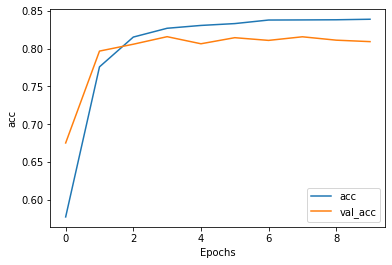

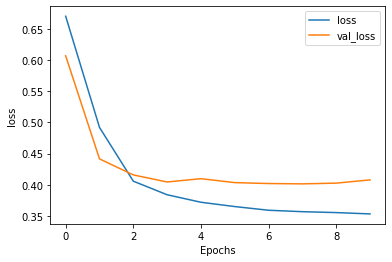

In [52]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [53]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store <OOV> <OOV> over secret <OOV> <OOV> for <OOV> <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [54]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [56]:
sentence = ["usa values middle east children lives"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
print(model.predict(padded))

[[0.740903]]
